In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
titanic=sns.load_dataset('titanic')

features=['pclass','sex','fare','embarked','age']
target=['survived']

#handle missing data
imp_median=SimpleImputer(strategy='median')
titanic[['age']]=imp_median.fit_transform(titanic[['age']])

imp_freq=SimpleImputer(strategy='most_frequent')
titanic[['embarked']]=imp_freq.fit_transform(titanic[['embarked']])

#encode
le=LabelEncoder()

titanic['sex']=le.fit_transform(titanic['sex'])
titanic['embarked']=le.fit_transform(titanic['embarked'])

x=titanic[features]
y=titanic['survived']

# train test spliti
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.3,random_state=42
)

In [3]:
model=DecisionTreeClassifier(max_depth=6)
model.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)

print('training accuracy:',accuracy_score(y_train,y_pred_train))
print('testing accuracy:',accuracy_score(y_test,y_pred_test))

#classic case of overfitting


training accuracy: 0.8715890850722311
testing accuracy: 0.7835820895522388


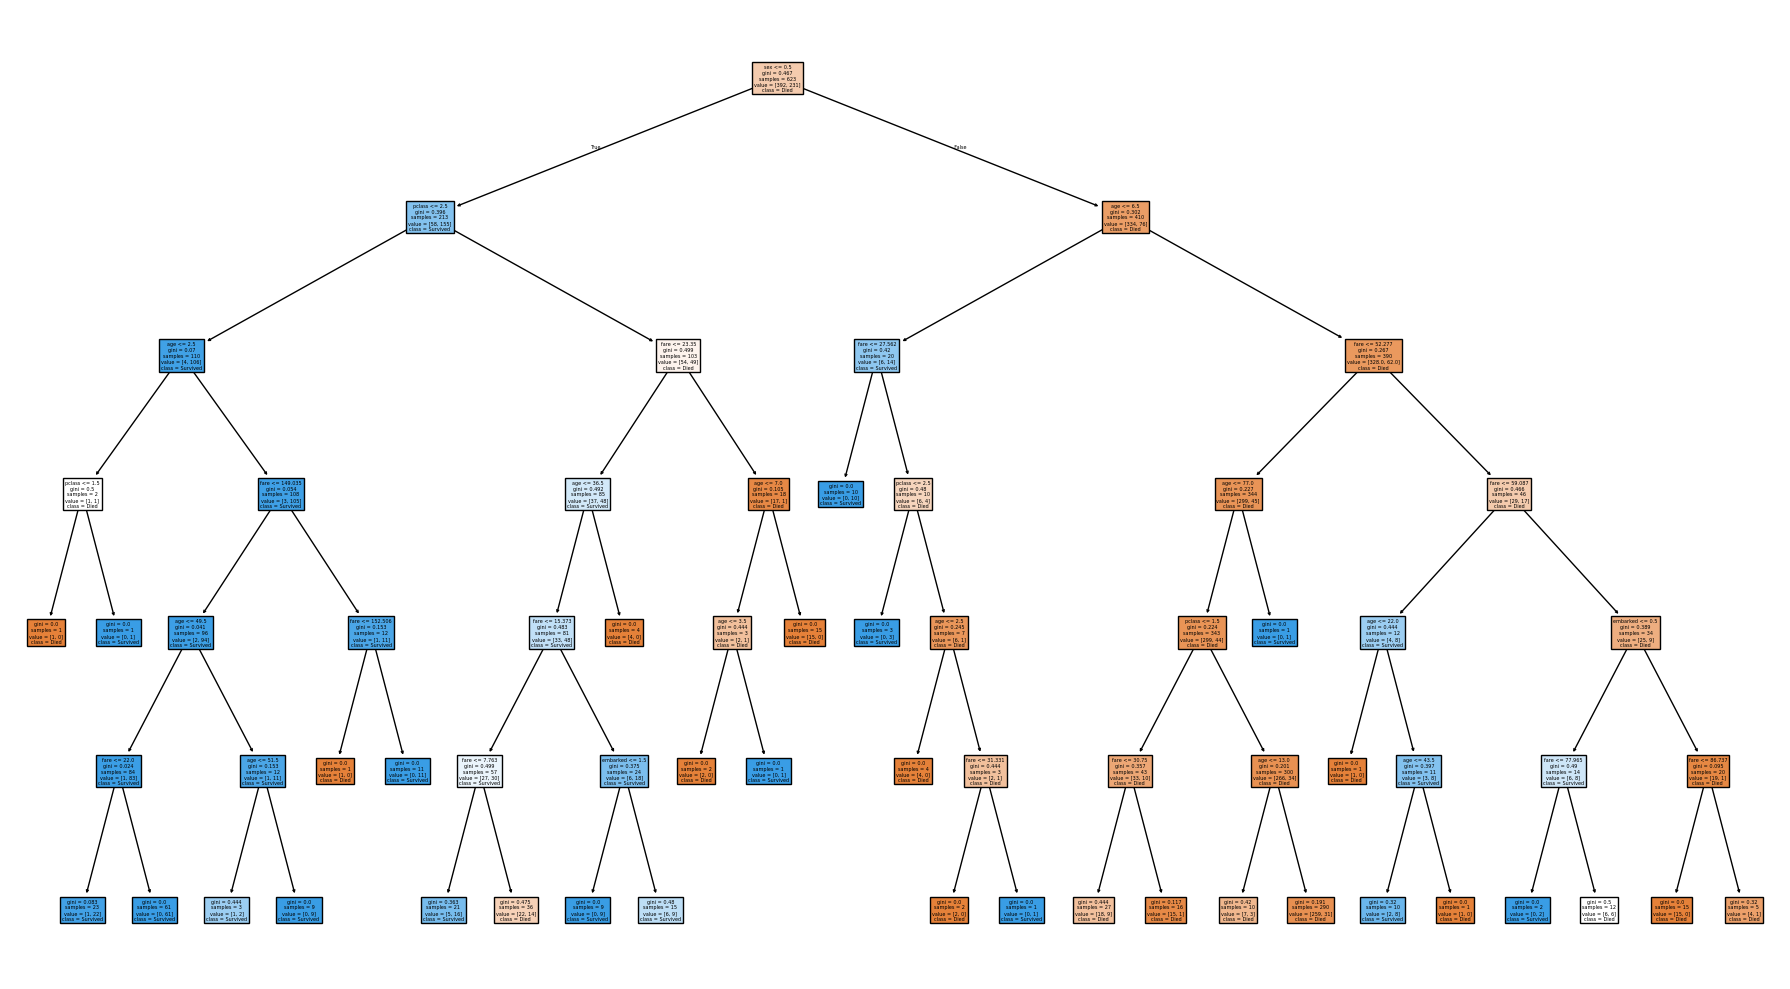

In [4]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=x.columns,
    class_names=['Died','Survived'],
    filled=True
)

plt.tight_layout()

In [9]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
    n_estimators=401,
    oob_score=True,
    max_depth=4,
    max_features=1.0,
    max_samples=1.0
)

rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred_train=rf.predict(x_train)
print('testing accuracy',accuracy_score(y_test,y_pred))
print('oob score',rf.oob_score_)

print('training accuracy:',accuracy_score(y_train,y_pred_train))

testing accuracy 0.8059701492537313
oob score 0.8234349919743178
training accuracy: 0.8571428571428571


In [10]:
#Bagging classifier
from sklearn.ensemble import BaggingClassifier
base_model=DecisionTreeClassifier()
bagging=BaggingClassifier(
    base_model,
    n_estimators=201
)

bagging.fit(x_train,y_train)
y_pred=bagging.predict(x_test)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.7761194029850746


In [11]:
#Bagging classifier
from sklearn.linear_model import LogisticRegression
base_model=LogisticRegression(max_iter=1000)

bagging=BaggingClassifier(
    base_model,
    n_estimators=201
)

bagging.fit(x_train,y_train)
y_pred=bagging.predict(x_test)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.7947761194029851
